#### Import required libs

In [1]:
import sys
sys.path.append('/home/jupyter/app')

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.options.display.float_format = "{:.5f}".format
pd.options.display.max_columns = 999

from src.io_utils import load_dataframe

#### Define constants

In [2]:
GS_DIR_FEATURES = "gs://pcqm4mv2/data/features"

#### Load dataset as pandas DataFrame

In [3]:
df = load_dataframe("train.csv", GS_DIR_FEATURES)

print("df shape:", df.shape)
df.head()

/opt/conda/lib/python3.7/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


df shape: (3378606, 29)


,smiles,homolumogap,number_of_atoms,number_of_heavy_atoms,number_of_bonds,number_of_heavy_bonds,number_of_conformations,exact_mol_weight,average_mol_weight,heavy_mol_weight,number_of_radical_electrons,number_of_valence_electrons,fp_morgan_density_1,fp_morgan_density_2,fp_morgan_density_3,max_absolute_partial_charge,min_absolute_partial_charge,max_partial_charge,min_partial_charge,number_of_B_atoms,number_of_C_atoms,number_of_N_atoms,number_of_O_atoms,number_of_F_atoms,number_of_Si_atoms,number_of_P_atoms,number_of_S_atoms,number_of_Cl_atoms,number_of_Br_atoms
idx,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,O=C1[N]c2ccncc2[CH][C@@H]1c1ccc(cc1)C,3.04768,30,18,32,20,0,236.09496,236.27400,224.17800,2,88,1.11111,1.88889,2.66667,0.27186,0.25392,0.25392,-0.27186,0,15,2,1,0,0,0,0,0,0
1,COc1cc(OC)ccc1/C=C/N(C(=O)C)C,4.41097,34,17,34,17,0,235.12084,235.28300,218.14700,0,92,1.29412,2.00000,2.52941,0.49662,0.22263,0.22263,-0.49662,0,13,1,3,0,0,0,0,0,0
2,C=CCN(C(=O)C)/C=C/c1ccccc1C,4.63954,33,16,33,16,0,215.13101,215.29600,198.16000,0,84,1.43750,2.12500,2.68750,0.31550,0.22318,0.22318,-0.31550,0,14,1,1,0,0,0,0,0,0
3,C=CCN(C(=O)C)/C=C/c1ccccc1F,4.49260,30,16,30,16,0,219.10594,219.25900,205.14700,0,84,1.50000,2.18750,2.75000,0.31550,0.22318,0.22318,-0.31550,0,13,1,1,1,0,0,0,0,0
4,C=CCN(C(=O)C)/C=C/c1ccccc1Cl,4.61233,30,16,30,16,0,235.07639,235.71400,221.60200,0,84,1.50000,2.18750,2.75000,0.31550,0.22318,0.22318,-0.31550,0,13,1,1,0,0,0,0,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3378606 entries, 0 to 3378605
Data columns (total 29 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   smiles                       object 
 1   homolumogap                  float64
 2   number_of_atoms              int64  
 3   number_of_heavy_atoms        int64  
 4   number_of_bonds              int64  
 5   number_of_heavy_bonds        int64  
 6   number_of_conformations      int64  
 7   exact_mol_weight             float64
 8   average_mol_weight           float64
 9   heavy_mol_weight             float64
 10  number_of_radical_electrons  int64  
 11  number_of_valence_electrons  int64  
 12  fp_morgan_density_1          float64
 13  fp_morgan_density_2          float64
 14  fp_morgan_density_3          float64
 15  max_absolute_partial_charge  float64
 16  min_absolute_partial_charge  float64
 17  max_partial_charge           float64
 18  min_partial_charge           float64
 19  

#### Summary statistics

In [10]:
display(df.describe().iloc[:,:6])
display(df.describe().iloc[:,6:12])
display(df.describe().iloc[:,12:18])
display(df.describe().iloc[:,18:24])
display(df.describe().iloc[:,24:])

,homolumogap,number_of_atoms,number_of_heavy_atoms,number_of_bonds,number_of_heavy_bonds,number_of_conformations
count,3378606.00000,3378606.00000,3378606.00000,3378606.00000,3378606.00000,3378606.00000
mean,5.68946,29.48762,14.12169,29.90013,14.53421,0.00000
std,1.16214,6.91067,2.46943,7.02626,2.91436,0.00000
min,0.37552,2.00000,1.00000,0.00000,0.00000,0.00000
25%,4.91166,25.00000,13.00000,25.00000,13.00000,0.00000
50%,5.58378,30.00000,15.00000,30.00000,15.00000,0.00000
75%,6.37291,34.00000,16.00000,35.00000,17.00000,0.00000
max,47.02399,53.00000,20.00000,52.00000,27.00000,0.00000


,exact_mol_weight,average_mol_weight,heavy_mol_weight,number_of_radical_electrons,number_of_valence_electrons,fp_morgan_density_1
count,3378606.00000,3378606.00000,3378606.00000,3378606.00000,3378606.00000,3378606.00000
mean,201.60509,201.80487,186.31601,0.16831,77.59269,1.38880
std,31.74880,31.78551,30.12002,0.60757,13.10691,0.21928
min,8.00521,8.00600,8.00600,0.00000,4.00000,0.10000
25%,184.06703,184.21400,169.03600,0.00000,70.00000,1.25000
50%,208.15756,208.34500,192.13300,0.00000,80.00000,1.40000
75%,225.14773,225.33600,210.12800,0.00000,88.00000,1.53333
max,278.19943,278.39800,264.28600,18.00000,112.00000,2.00000


,fp_morgan_density_2,fp_morgan_density_3,max_absolute_partial_charge,min_absolute_partial_charge,max_partial_charge,min_partial_charge
count,3378606.00000,3378606.00000,3376195.00000,3376195.00000,3376195.00000,3376195.00000
mean,2.08606,2.63422,0.40021,0.19192,0.19433,-0.39732
std,0.27174,0.34326,0.09009,0.10736,0.11293,0.09090
min,0.15000,0.20000,0.00000,0.00000,-0.41151,-0.74022
25%,1.93333,2.43750,0.33652,0.11503,0.11510,-0.48078
50%,2.11765,2.66667,0.39454,0.18377,0.18414,-0.39327
75%,2.27273,2.87500,0.48096,0.28533,0.29136,-0.33046
max,3.00000,3.75000,1.00672,0.59137,1.00672,0.03794


,number_of_B_atoms,number_of_C_atoms,number_of_N_atoms,number_of_O_atoms,number_of_F_atoms,number_of_Si_atoms
count,3378606.00000,3378606.00000,3378606.00000,3378606.00000,3378606.00000,3378606.00000
mean,0.00525,10.52351,1.67736,1.47437,0.16621,0.00987
std,0.07881,2.65148,1.30004,1.23757,0.60275,0.10966
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.00000,9.00000,1.00000,1.00000,0.00000,0.00000
50%,0.00000,11.00000,2.00000,1.00000,0.00000,0.00000
75%,0.00000,12.00000,2.00000,2.00000,0.00000,0.00000
max,14.00000,20.00000,17.00000,12.00000,9.00000,7.00000


,number_of_P_atoms,number_of_S_atoms,number_of_Cl_atoms,number_of_Br_atoms
count,3378606.00000,3378606.00000,3378606.00000,3378606.00000
mean,0.01196,0.14996,0.09179,0.01077
std,0.11916,0.39330,0.33277,0.10414
min,0.00000,0.00000,0.00000,0.00000
25%,0.00000,0.00000,0.00000,0.00000
50%,0.00000,0.00000,0.00000,0.00000
75%,0.00000,0.00000,0.00000,0.00000
max,7.00000,6.00000,6.00000,2.00000


#### Check NaN values

In [11]:
df.isna().sum()

smiles                            0
homolumogap                       0
number_of_atoms                   0
number_of_heavy_atoms             0
number_of_bonds                   0
number_of_heavy_bonds             0
number_of_conformations           0
exact_mol_weight                  0
average_mol_weight                0
heavy_mol_weight                  0
number_of_radical_electrons       0
number_of_valence_electrons       0
fp_morgan_density_1               0
fp_morgan_density_2               0
fp_morgan_density_3               0
max_absolute_partial_charge    2411
min_absolute_partial_charge    2411
max_partial_charge             2411
min_partial_charge             2411
number_of_B_atoms                 0
number_of_C_atoms                 0
number_of_N_atoms                 0
number_of_O_atoms                 0
number_of_F_atoms                 0
number_of_Si_atoms                0
number_of_P_atoms                 0
number_of_S_atoms                 0
number_of_Cl_atoms          

#### Heatmap

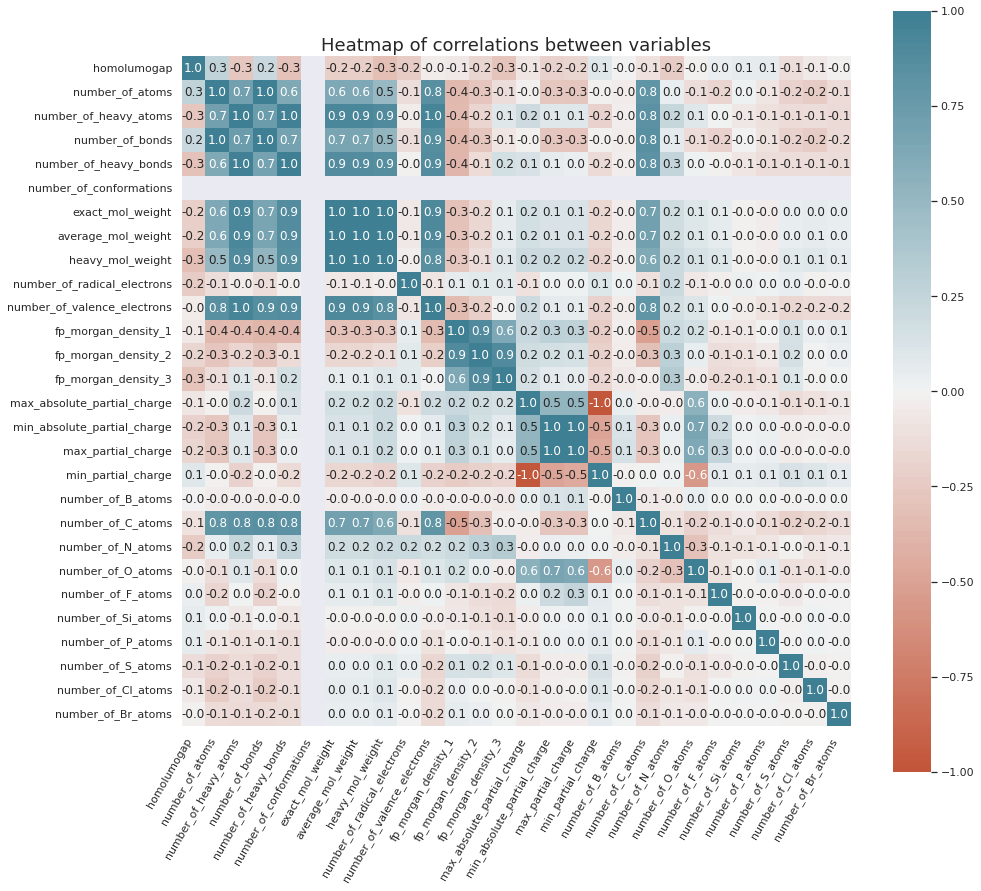

In [13]:
corr = df.corr()
# display(corr)

fig, ax = plt.subplots(figsize=(15, 14))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, 
            cmap=sns.diverging_palette(20, 220, n=200), square=True, 
            annot=True, fmt=".1f", 
            ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, horizontalalignment="right")
ax.set_title("Heatmap of correlations between variables", fontsize=18)
plt.show()

In [15]:
features = list(df.columns[2:])
target = list(df.columns[1:2])

print(f"{len(features)} features: {features}\n")
print(f"{len(target)} target: {target}")

27 features: ['number_of_atoms', 'number_of_heavy_atoms', 'number_of_bonds', 'number_of_heavy_bonds', 'number_of_conformations', 'exact_mol_weight', 'average_mol_weight', 'heavy_mol_weight', 'number_of_radical_electrons', 'number_of_valence_electrons', 'fp_morgan_density_1', 'fp_morgan_density_2', 'fp_morgan_density_3', 'max_absolute_partial_charge', 'min_absolute_partial_charge', 'max_partial_charge', 'min_partial_charge', 'number_of_B_atoms', 'number_of_C_atoms', 'number_of_N_atoms', 'number_of_O_atoms', 'number_of_F_atoms', 'number_of_Si_atoms', 'number_of_P_atoms', 'number_of_S_atoms', 'number_of_Cl_atoms', 'number_of_Br_atoms']

1 target: ['homolumogap']


#### Boxplots

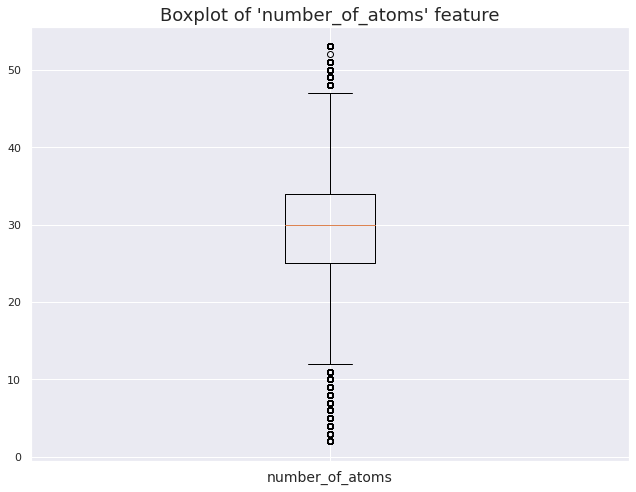

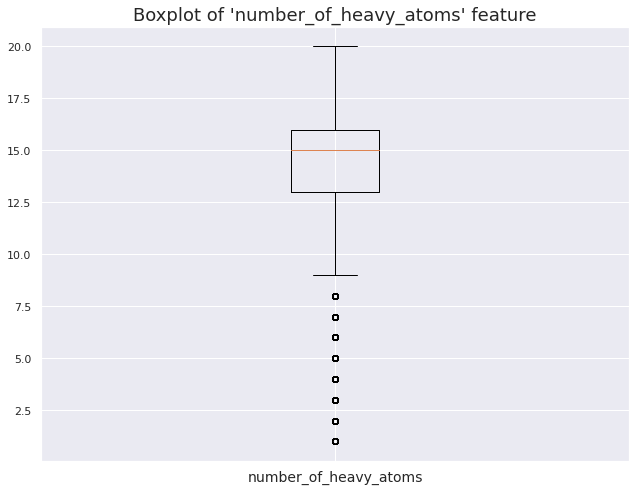

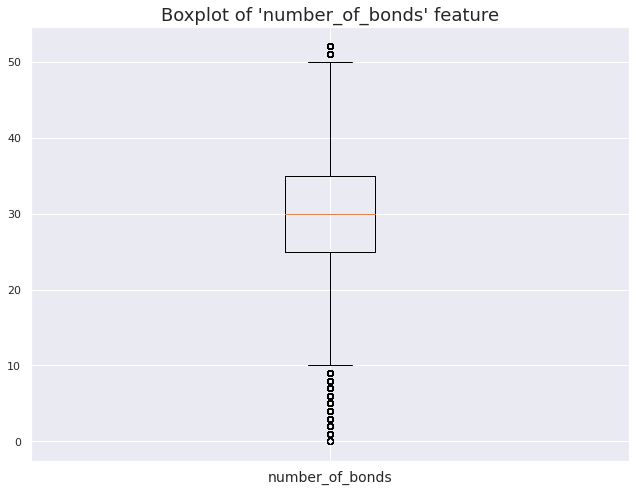

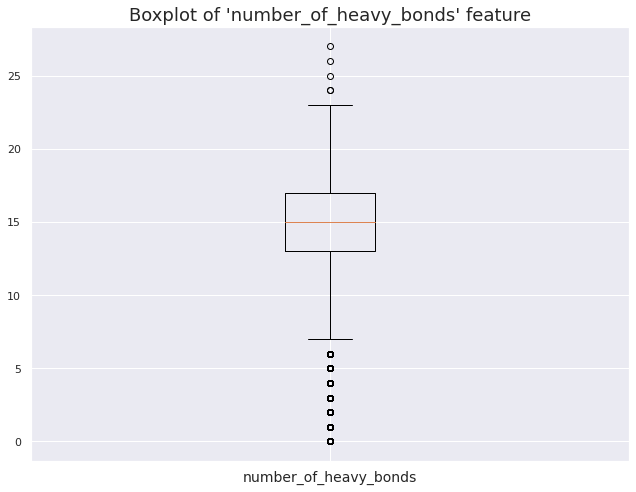

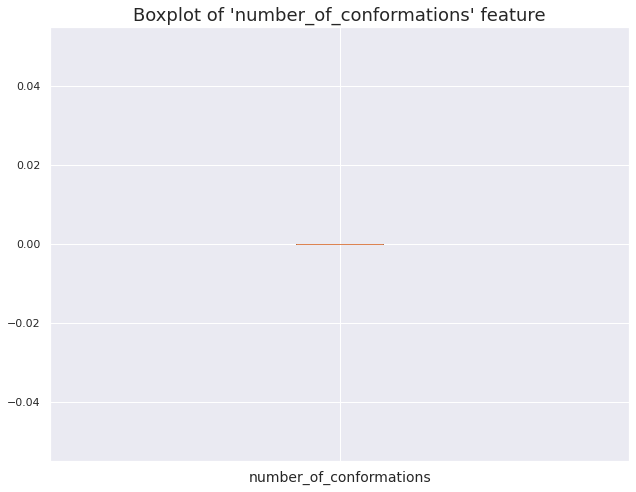

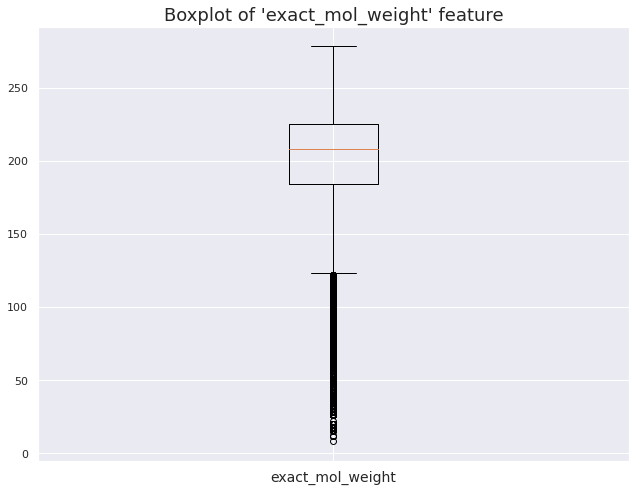

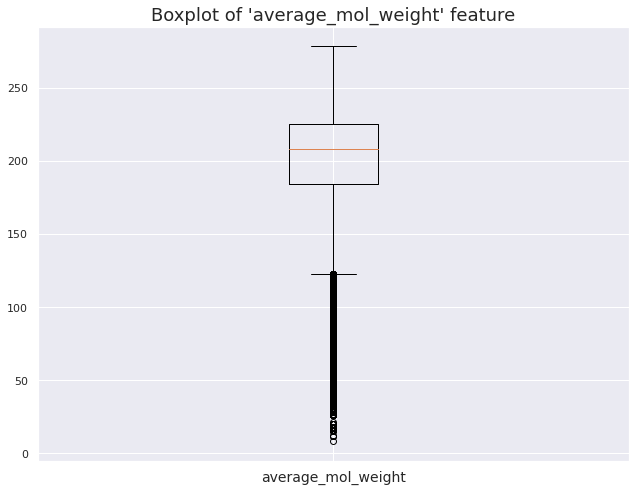

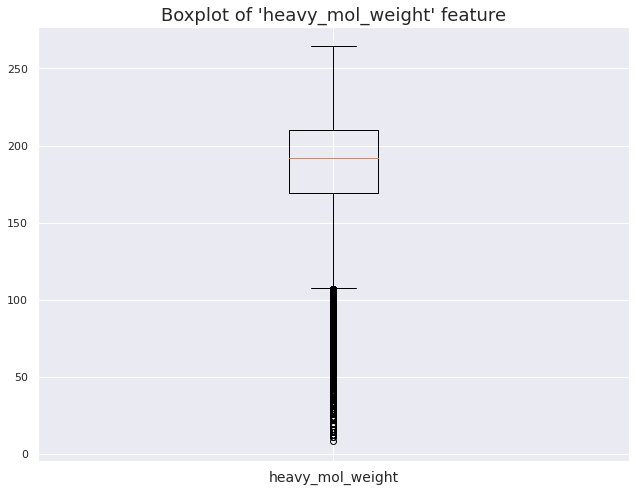

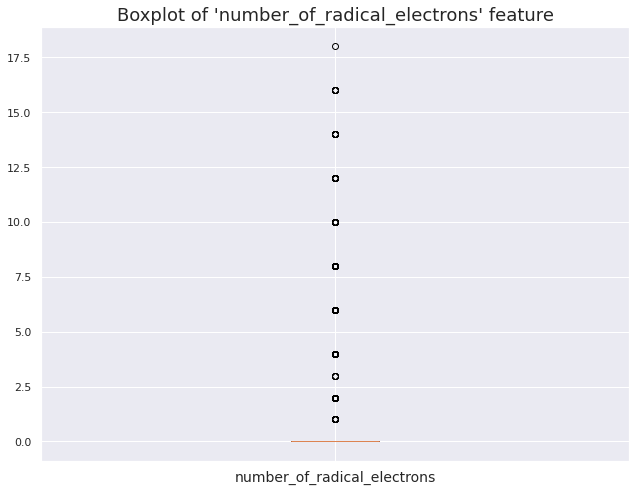

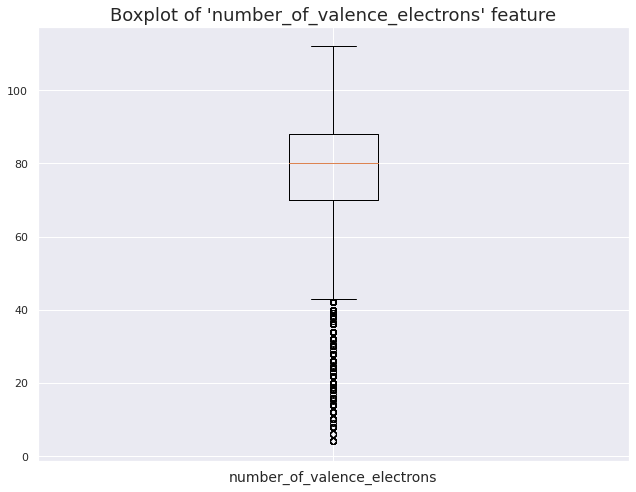

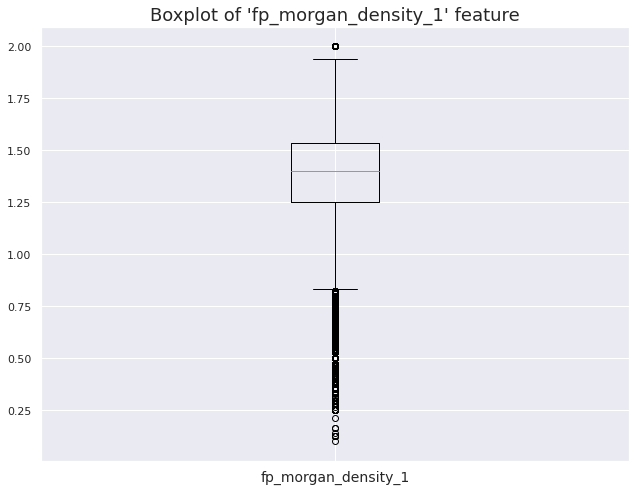

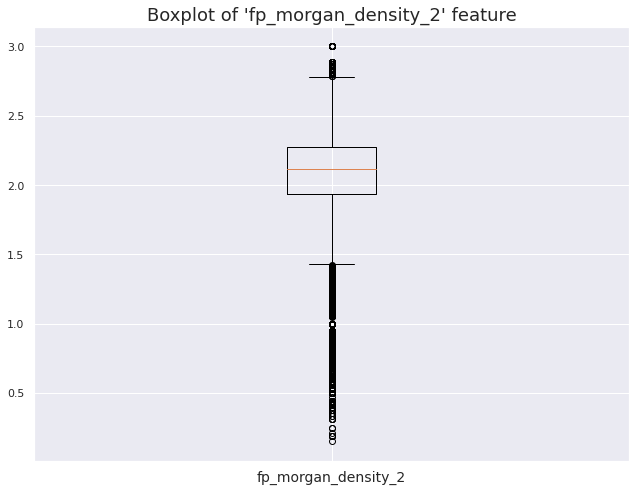

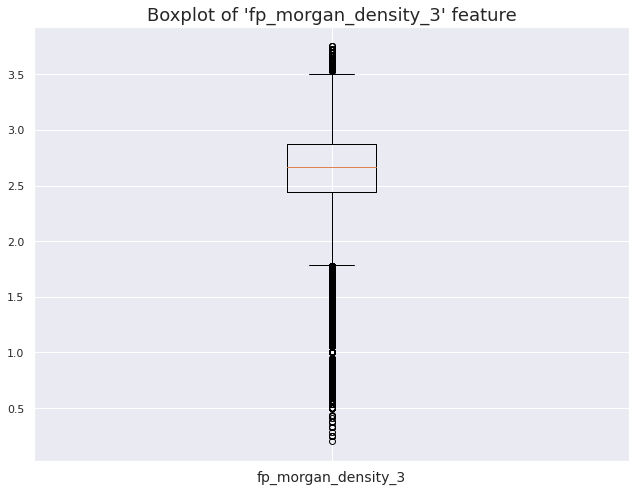

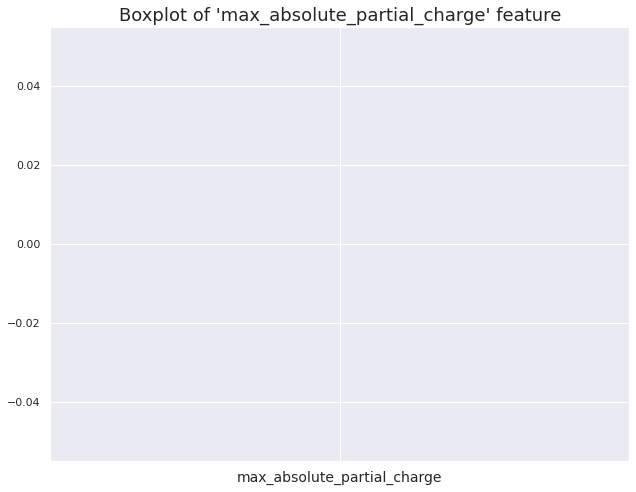

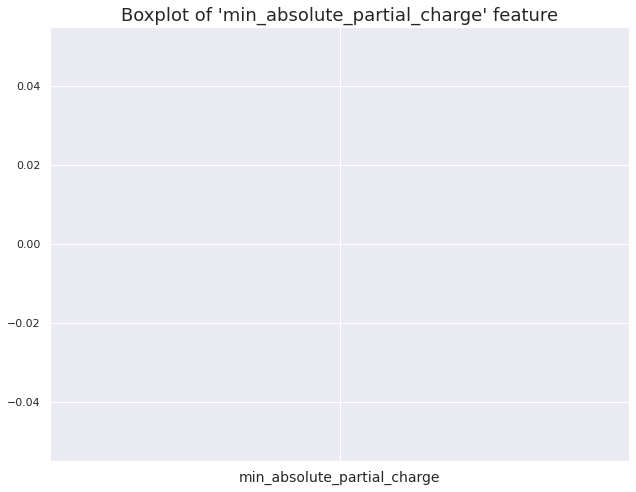

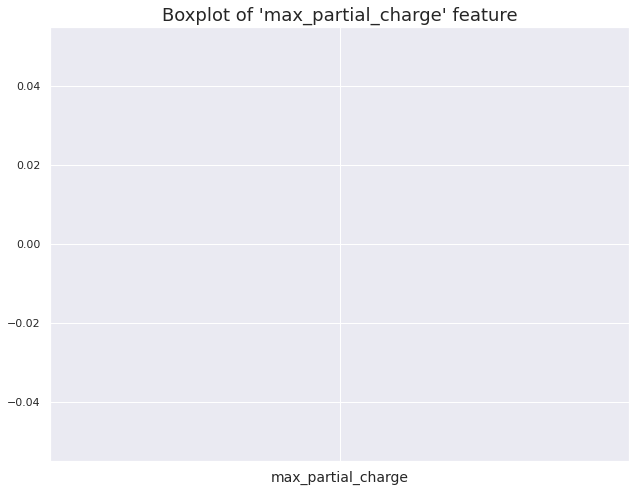

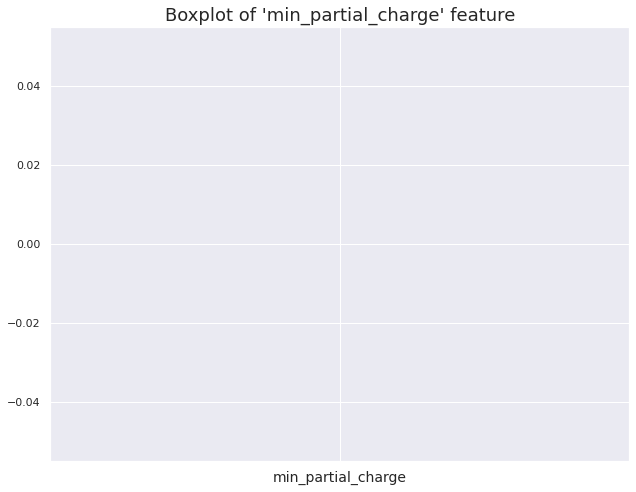

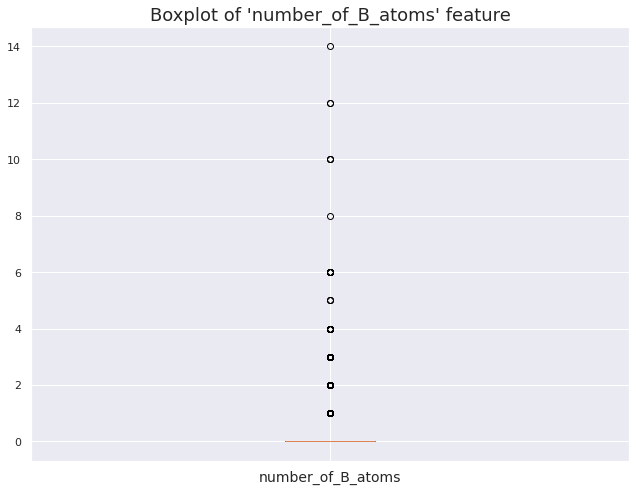

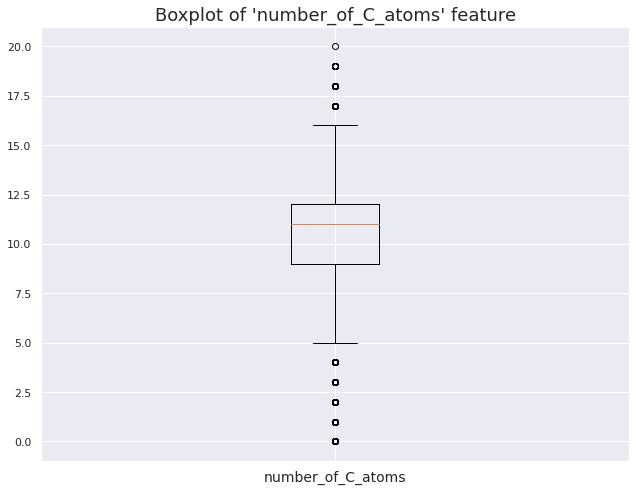

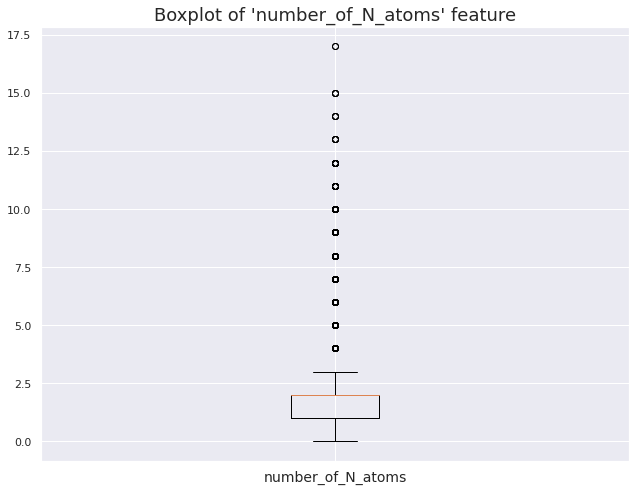

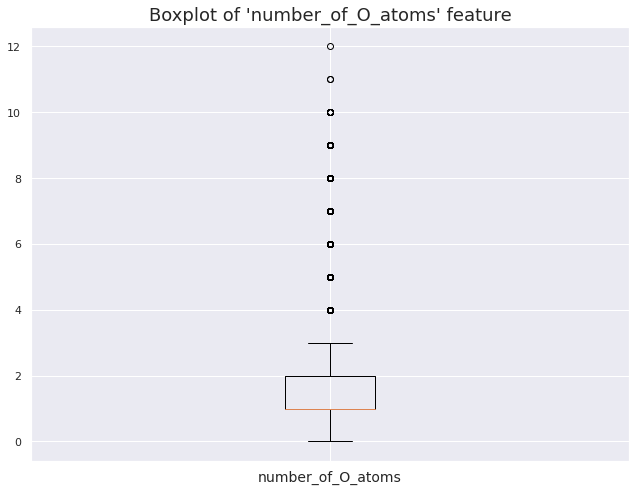

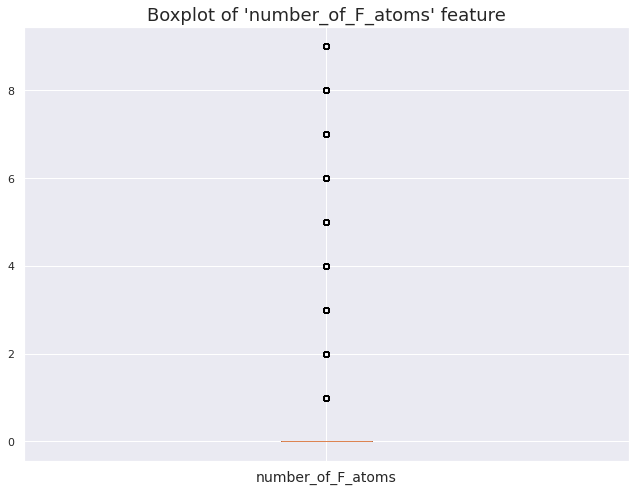

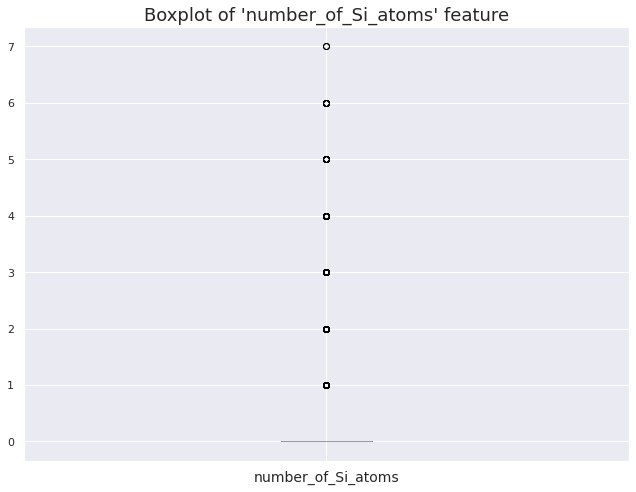

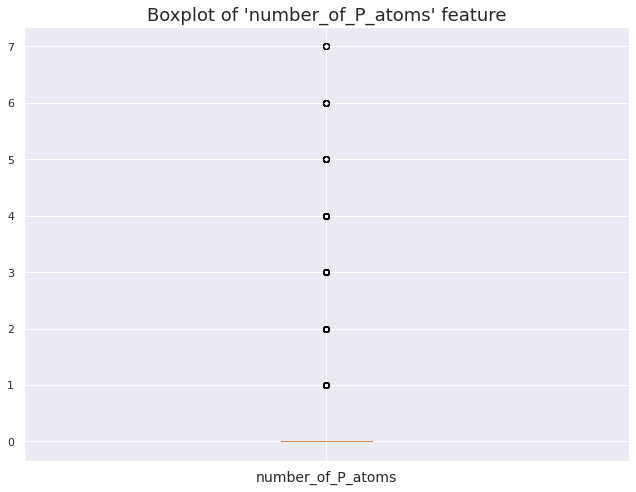

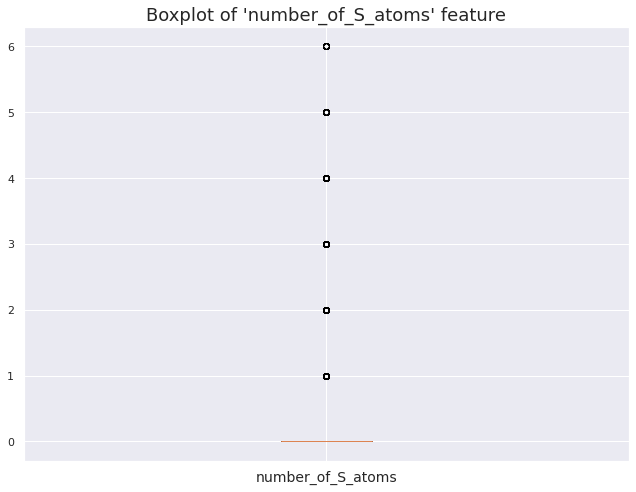

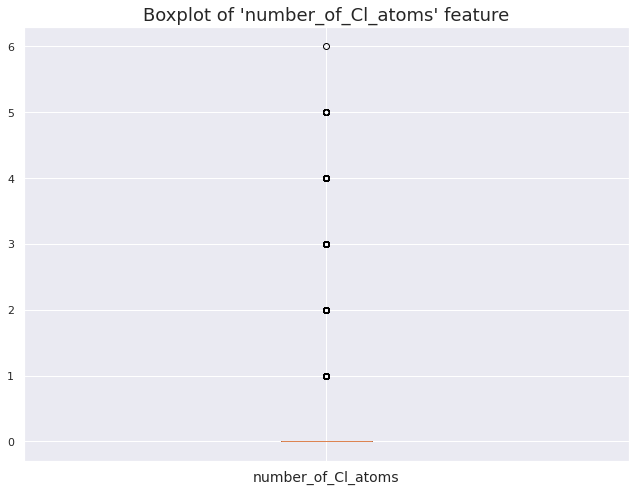

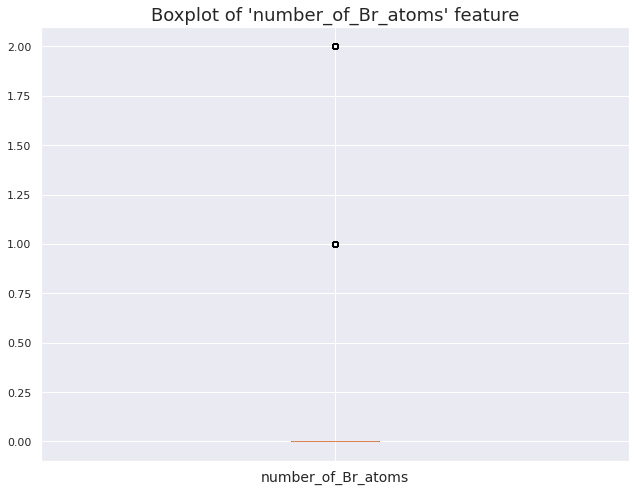

In [16]:
for feature in features:
    fig, ax = plt.subplots(figsize=(9, 7))
    ax.boxplot(df[feature])
    ax.set_title(f"Boxplot of '{feature}' feature", fontsize=18)
    ax.set_xticklabels([feature], fontsize=14)
    fig.tight_layout()
    plt.show()

#### Histograms

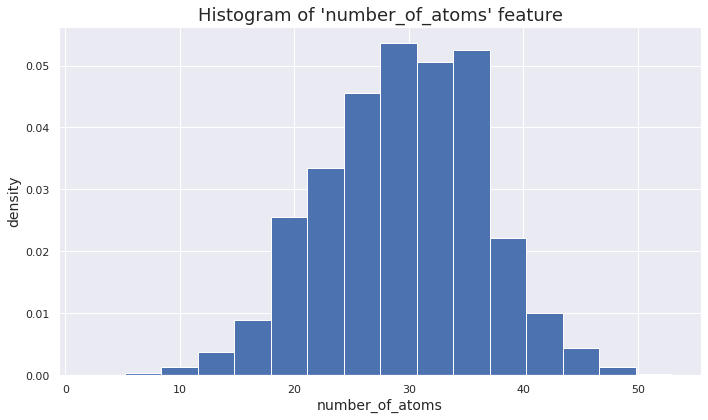

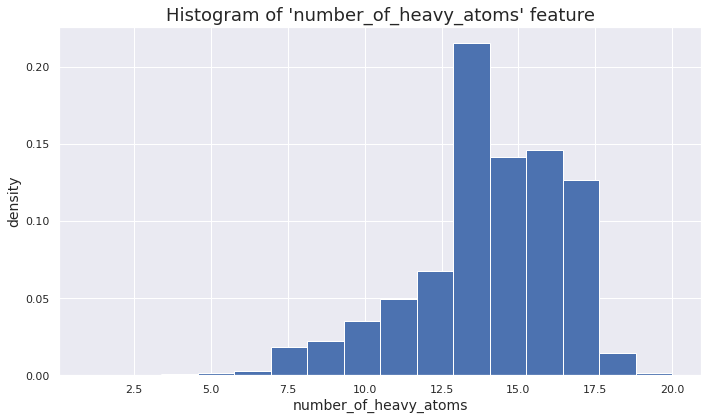

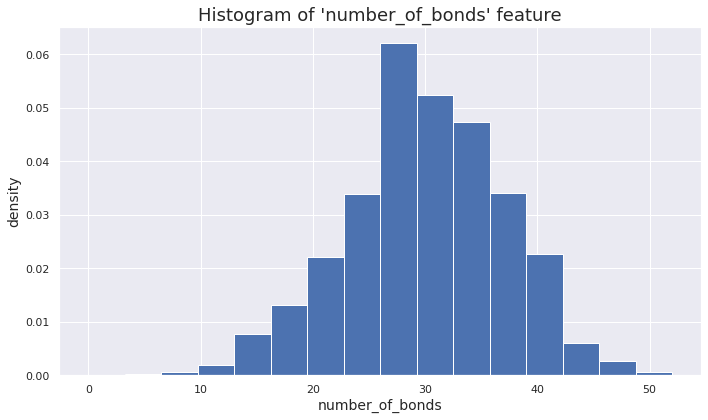

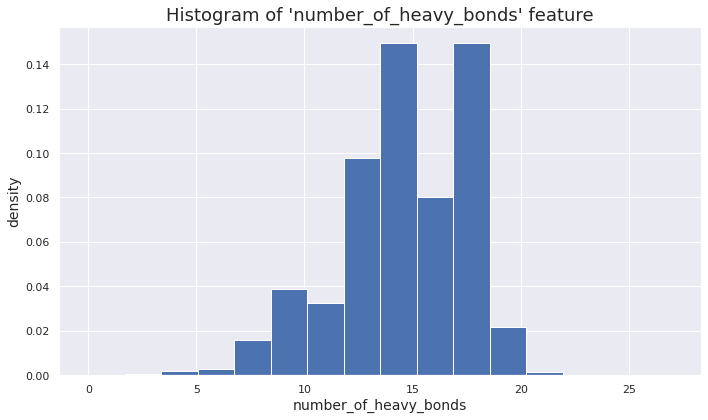

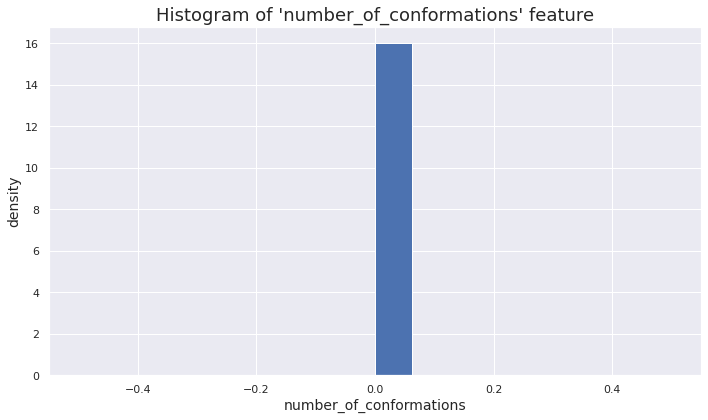

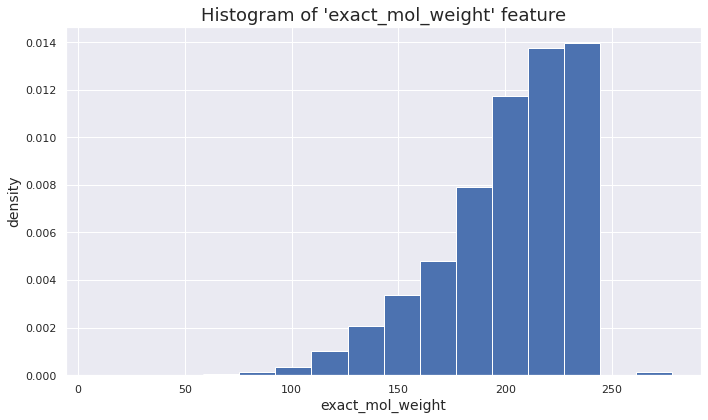

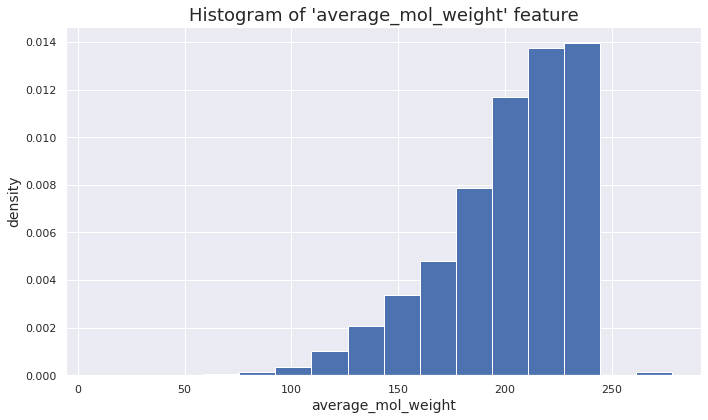

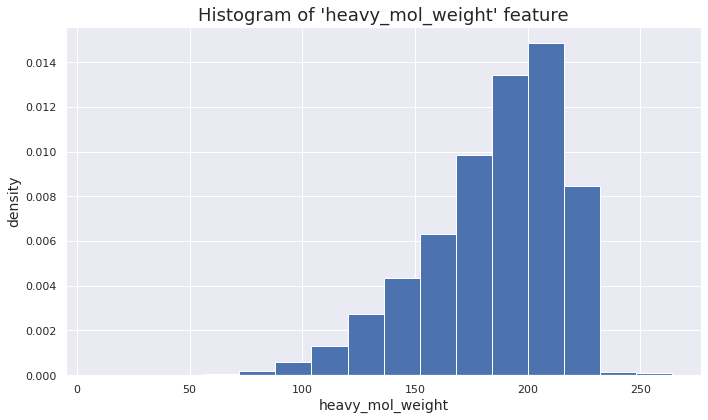

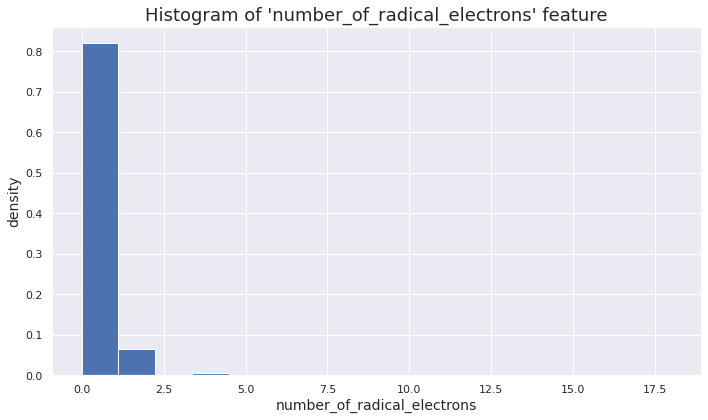

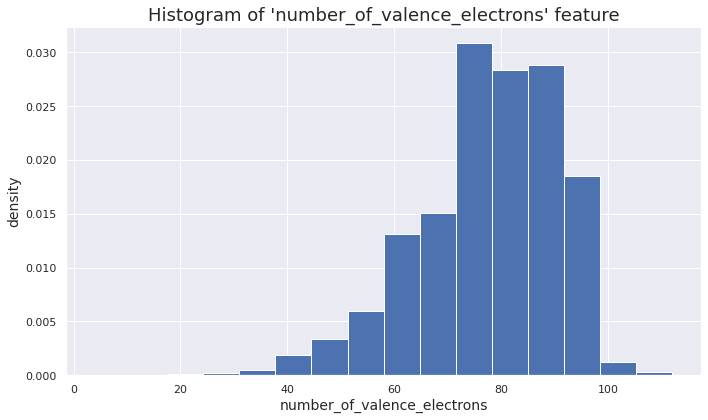

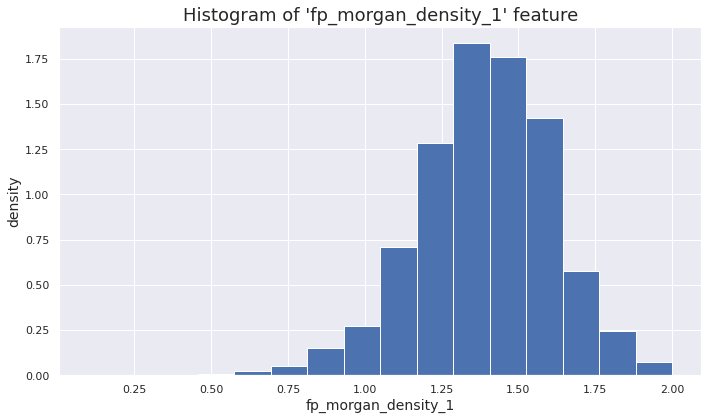

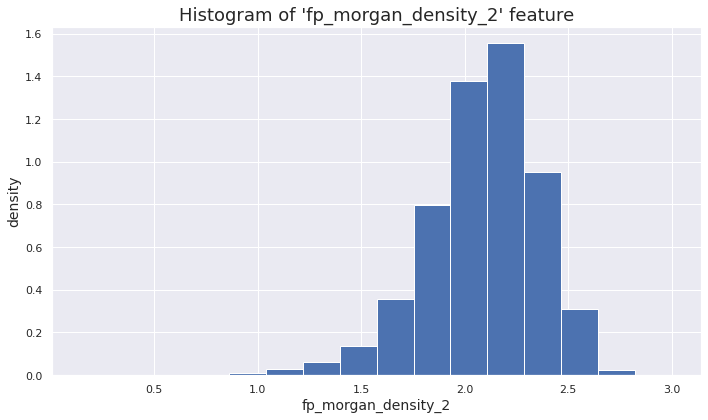

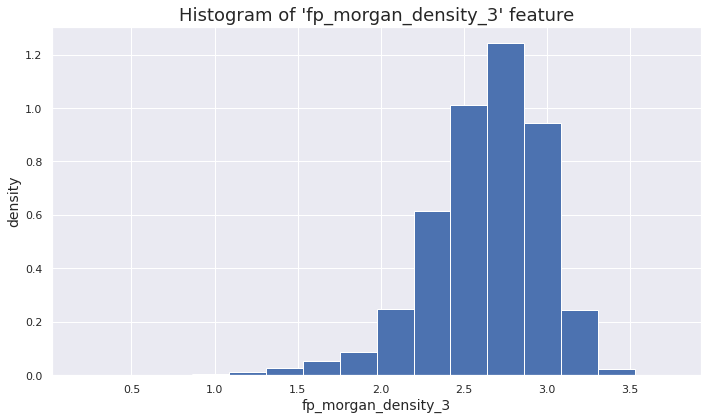

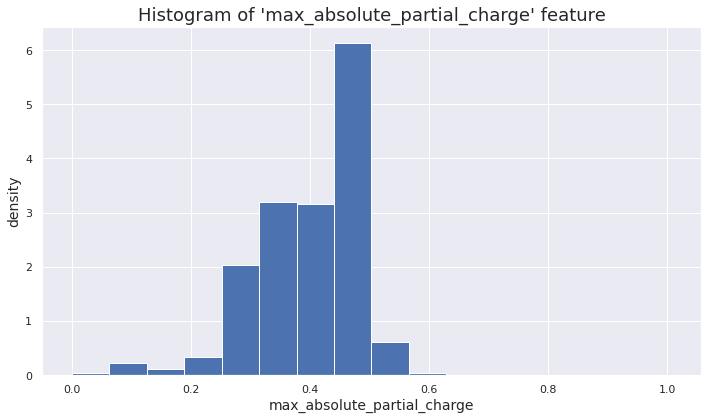

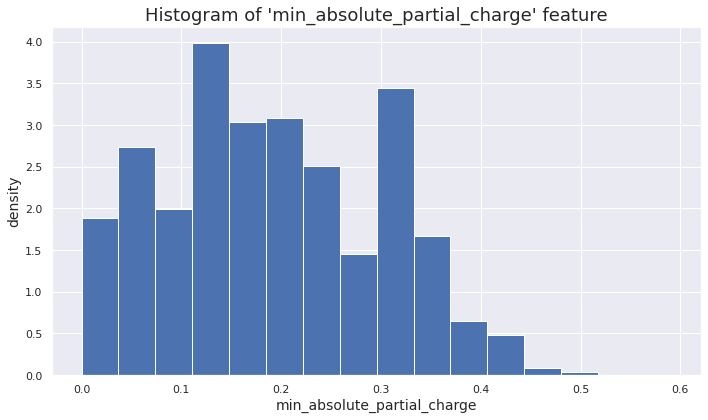

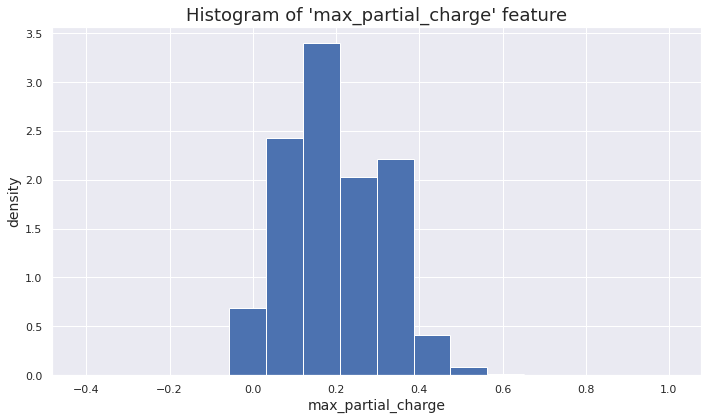

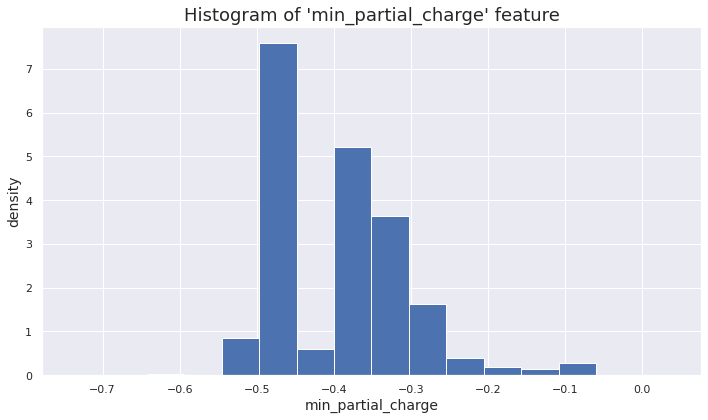

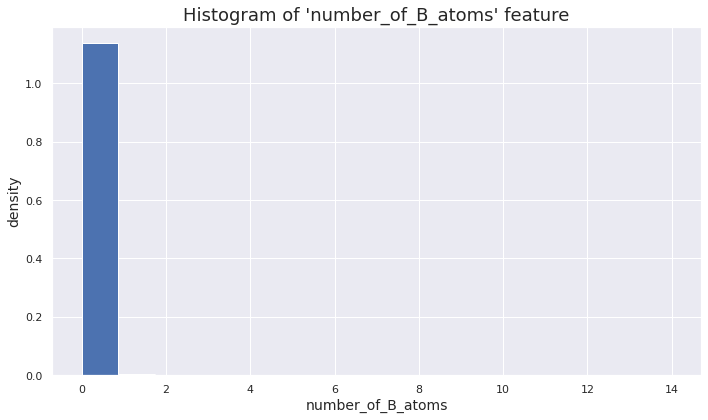

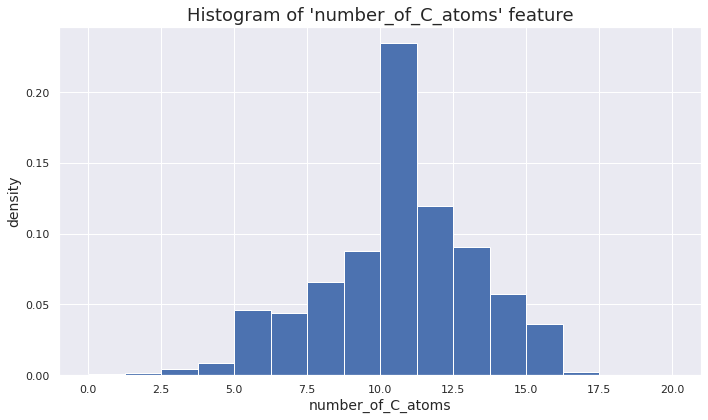

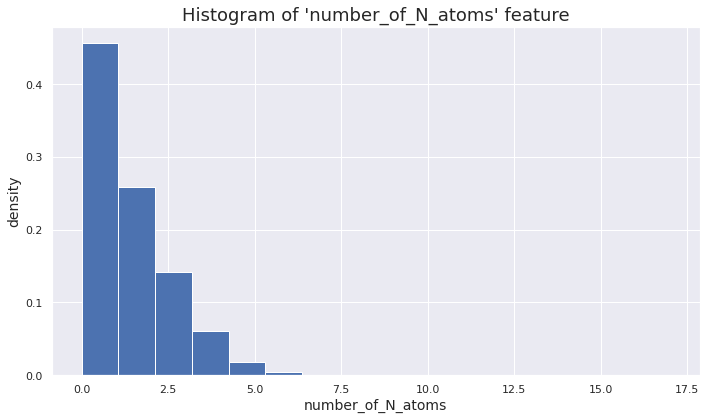

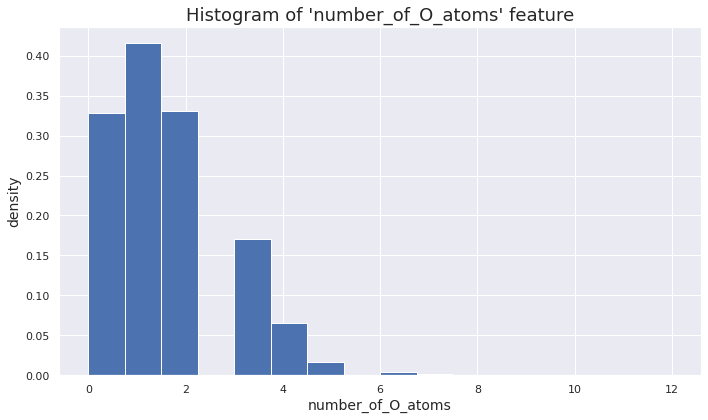

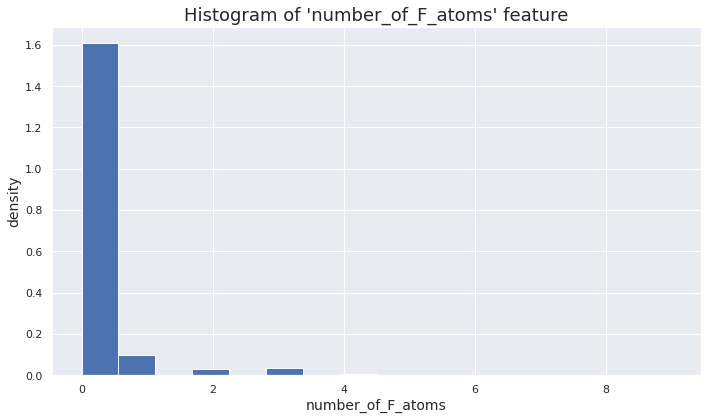

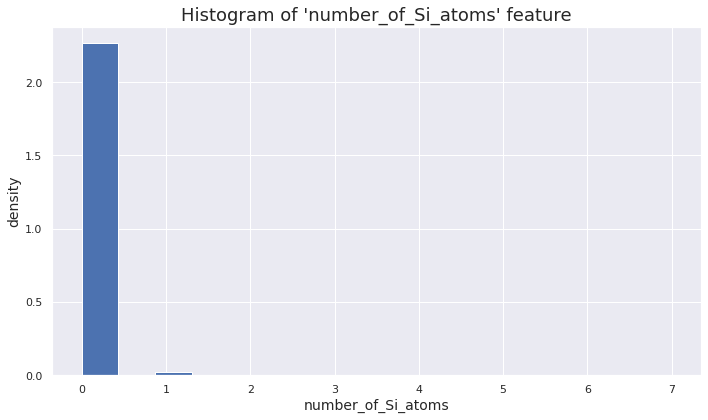

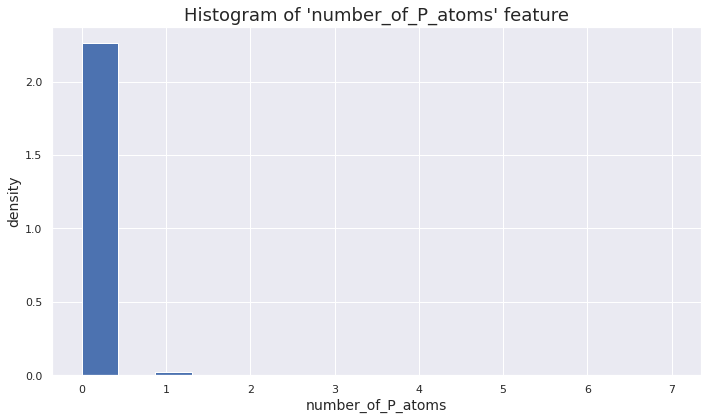

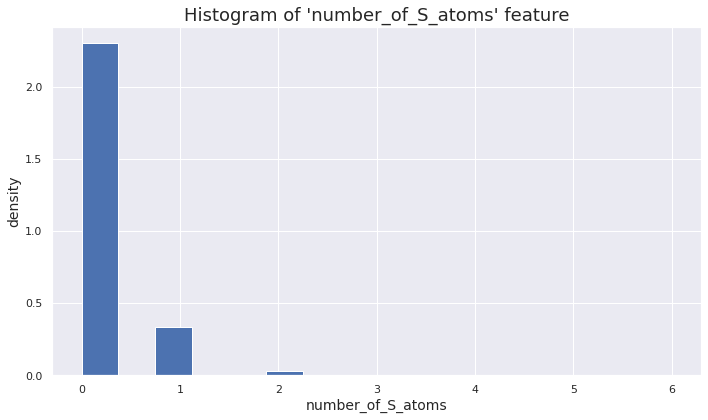

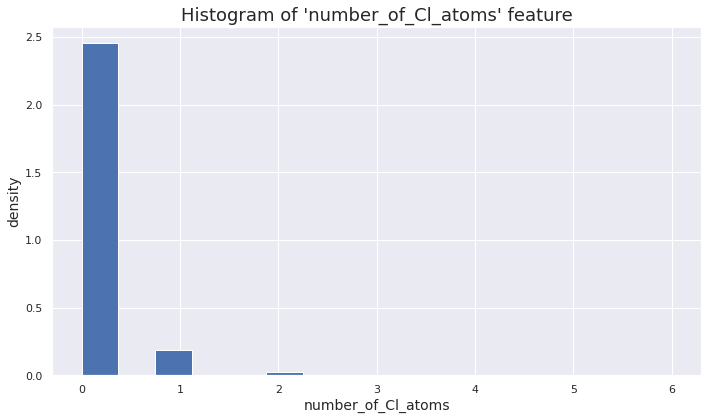

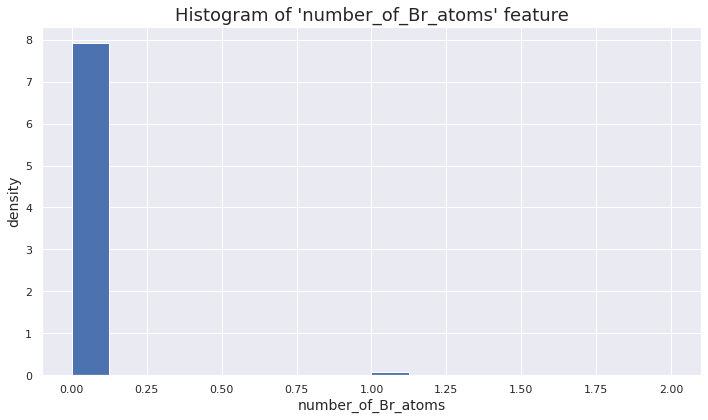

In [17]:
for feature in features:
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.hist(df[feature], density=True, bins=16)
    ax.set_title(f"Histogram of '{feature}' feature", fontsize=18)
    ax.set_xlabel(feature, fontsize=14)
    ax.set_ylabel("density", fontsize=14)
    fig.tight_layout()
    plt.show()

#### Scatter plots

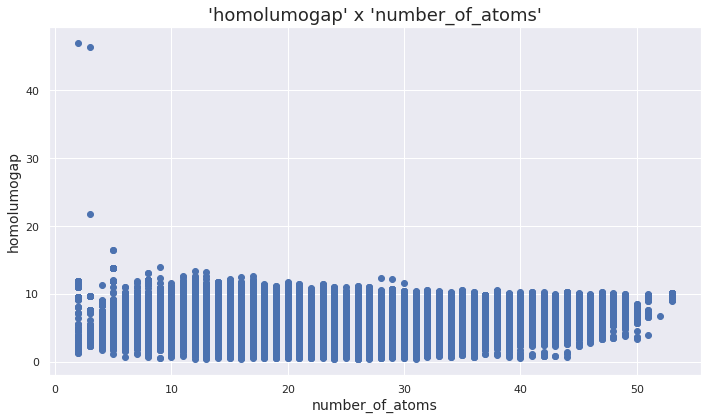

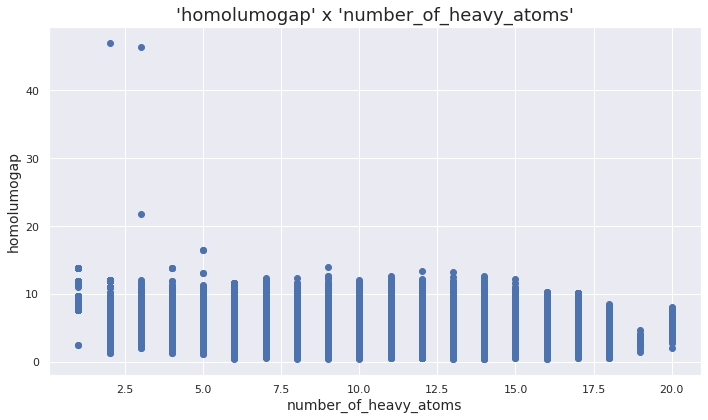

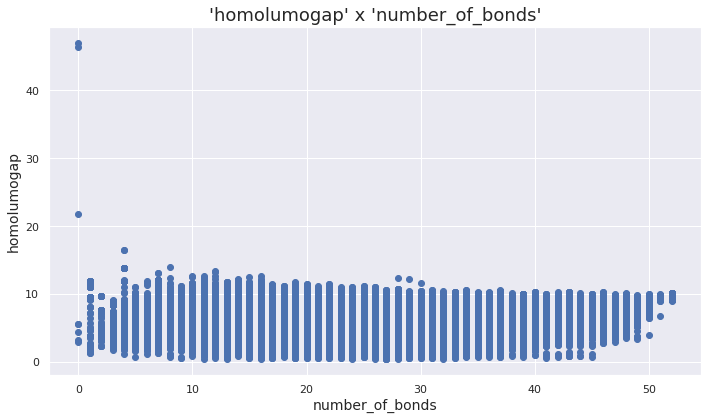

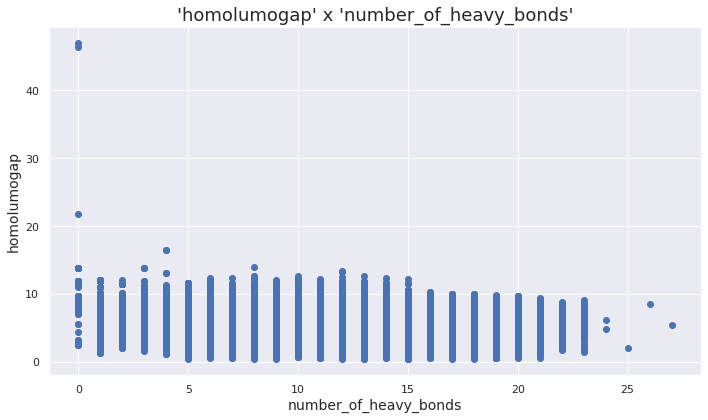

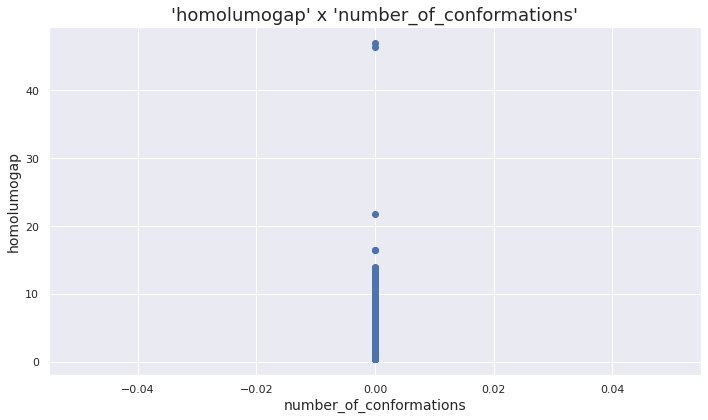

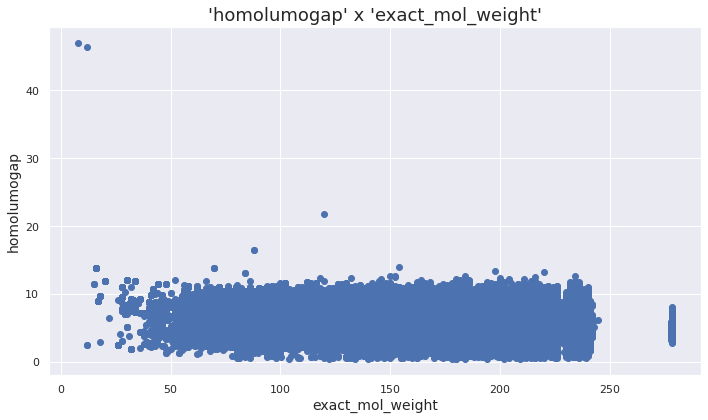

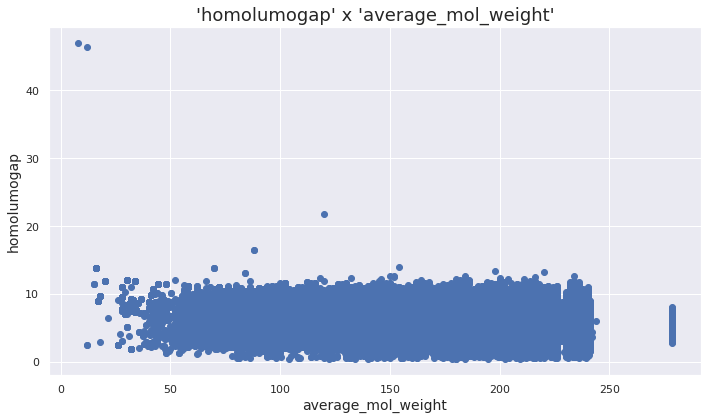

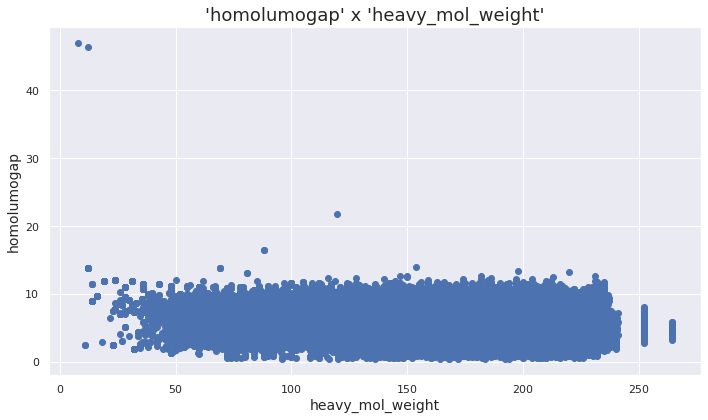

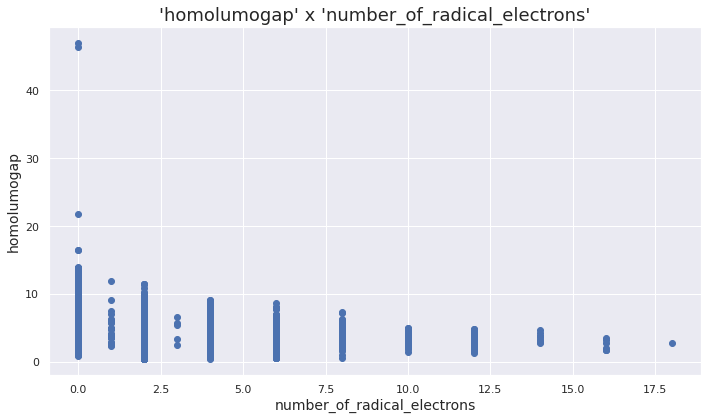

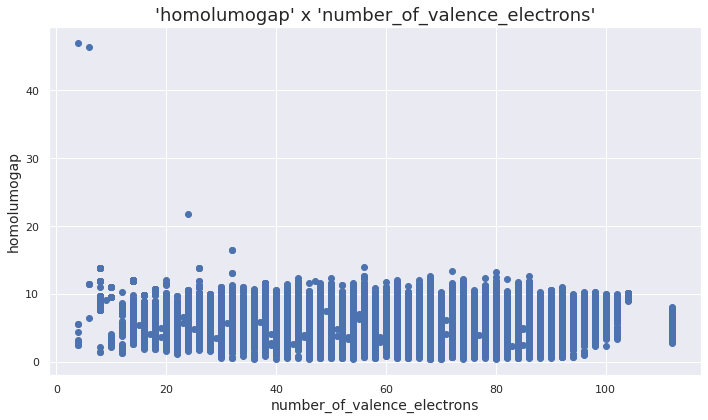

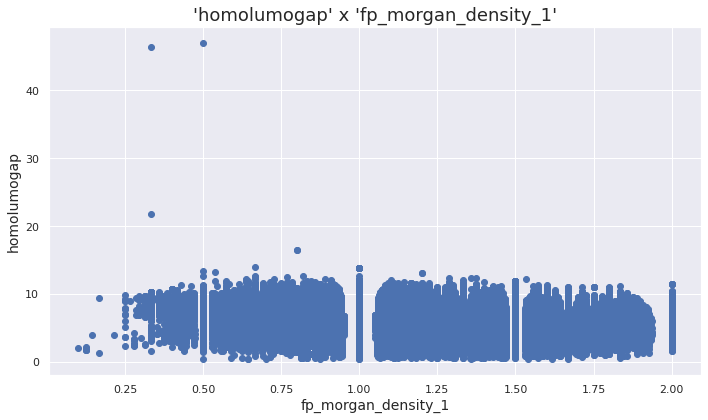

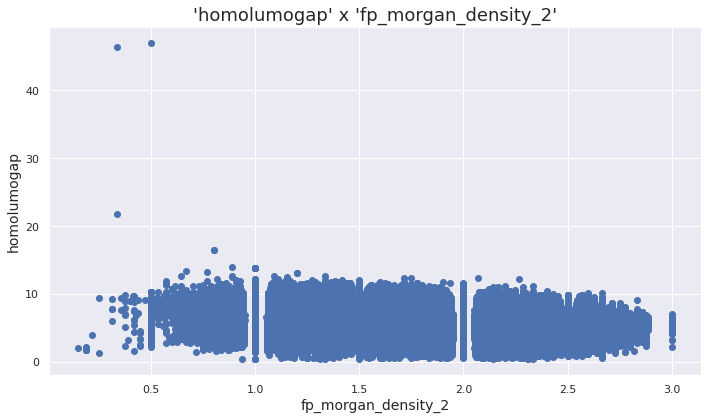

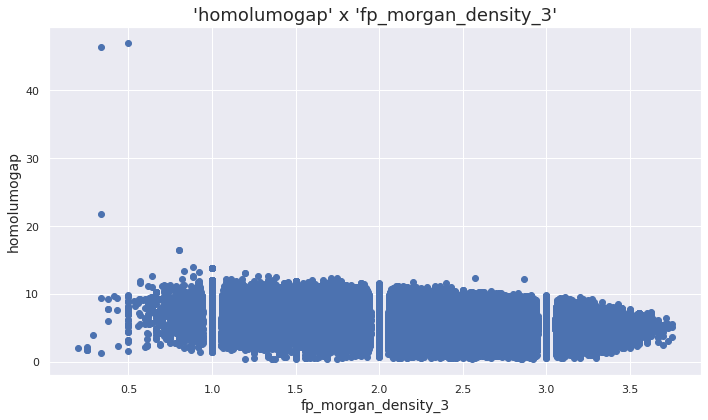

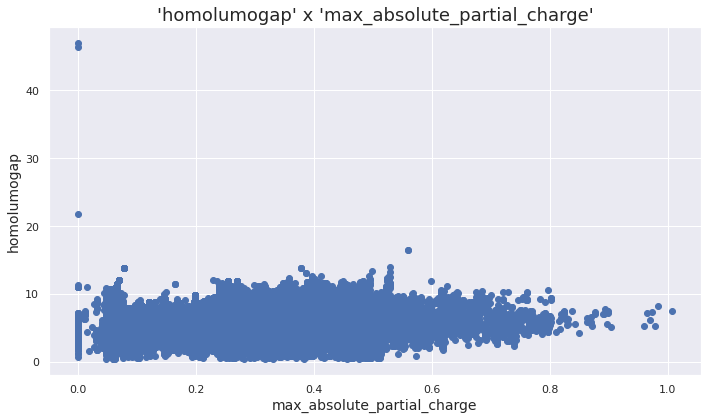

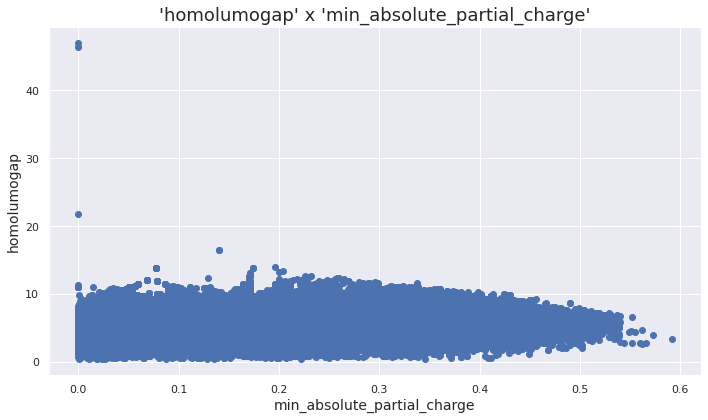

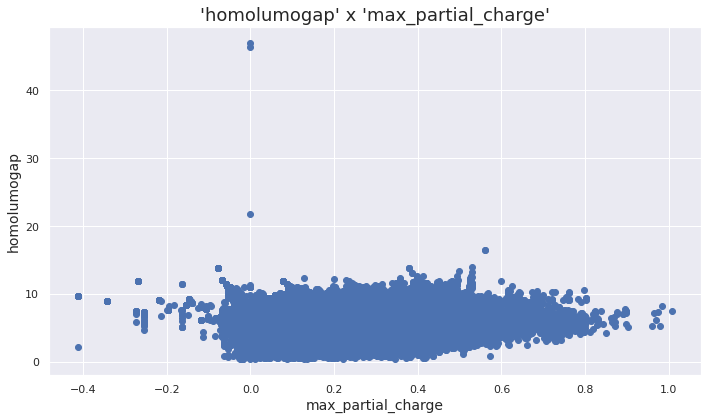

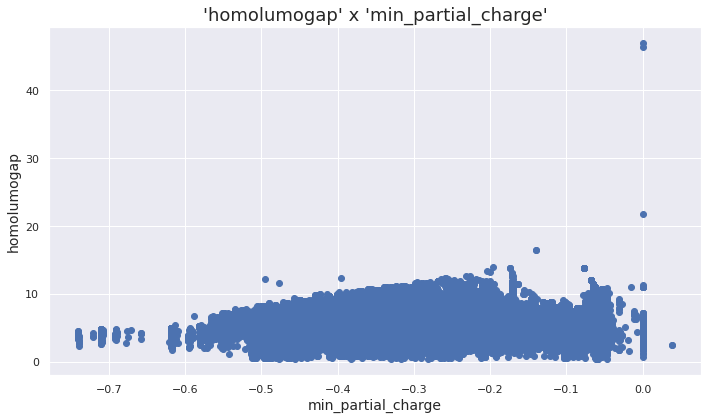

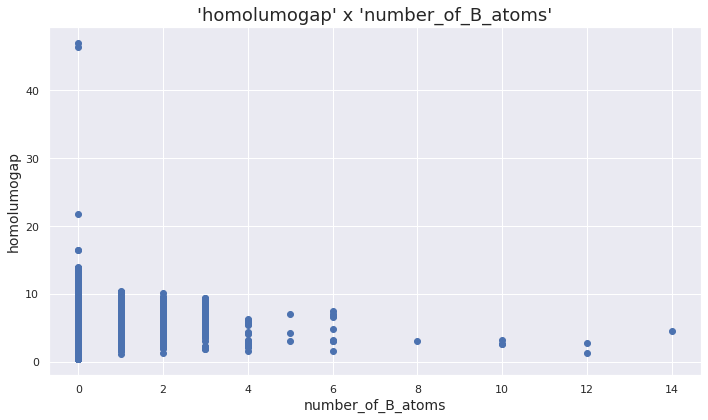

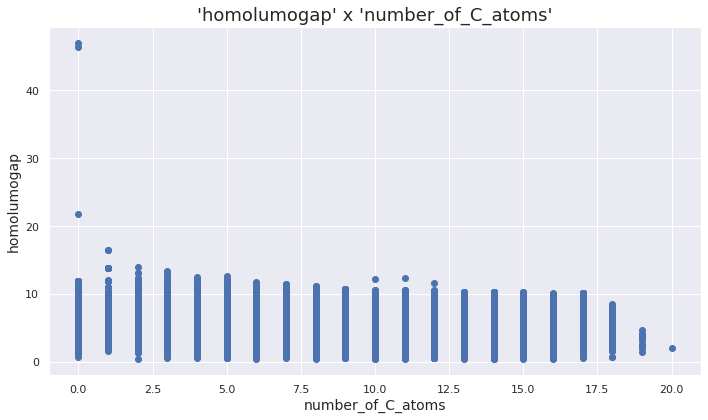

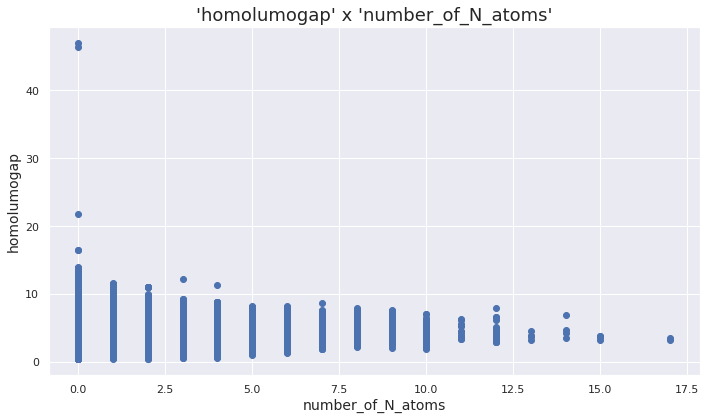

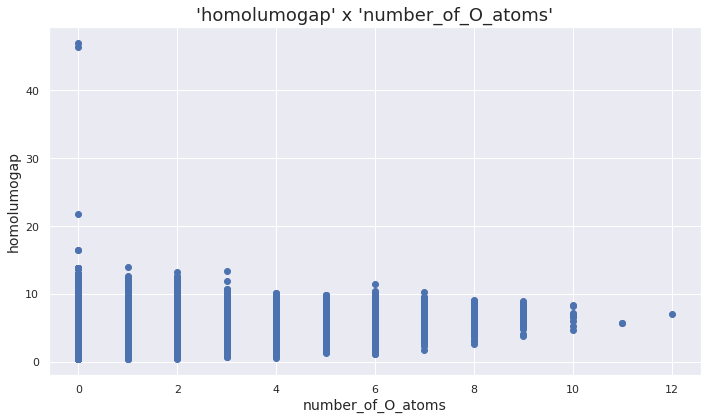

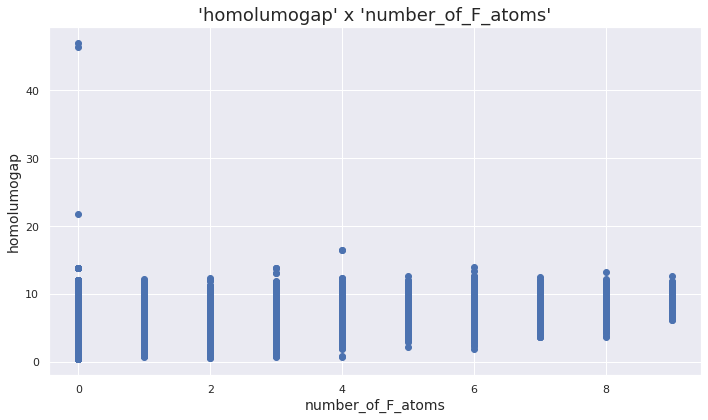

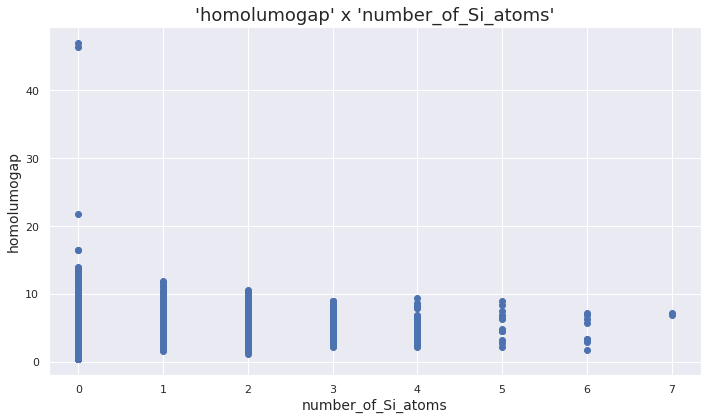

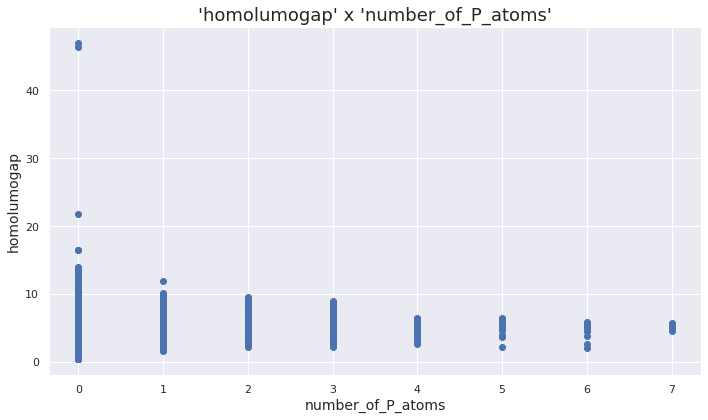

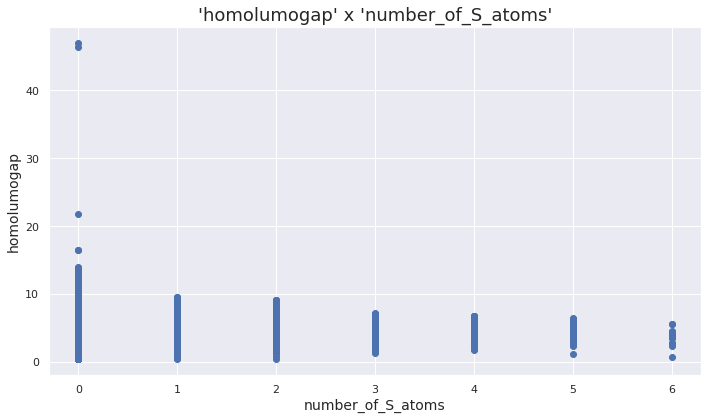

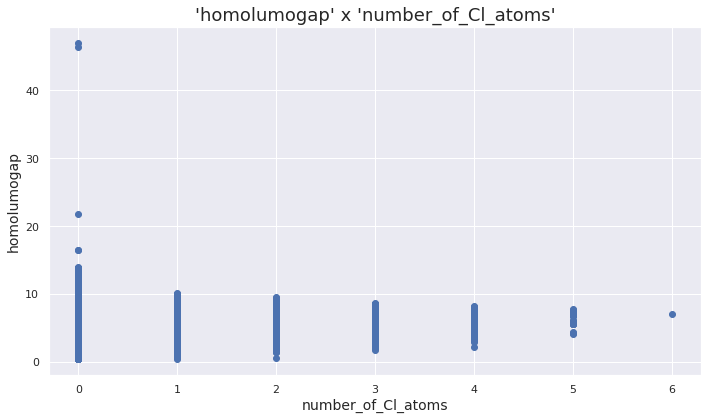

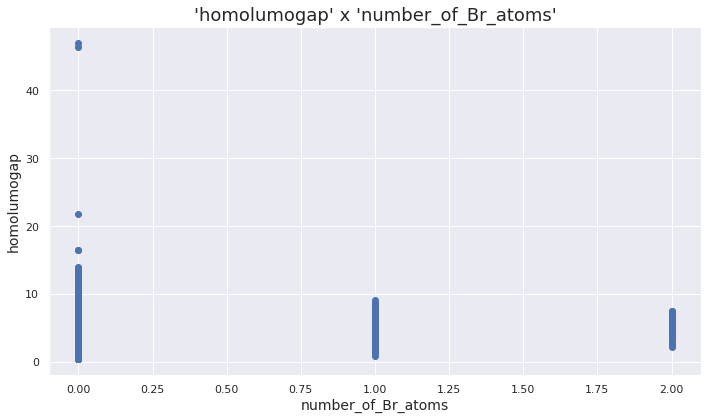

In [18]:
for feature in features:
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(df[feature], df[target[0]])
    ax.set_title(f"'{target[0]}' x '{feature}'", fontsize=18)
    ax.set_xlabel(feature, fontsize=14)
    ax.set_ylabel(target[0], fontsize=14)
    fig.tight_layout()
    plt.show()